In [56]:
import os
import pandas as pd

Folder_name = "Sample Dataset"
File_name = "data_set_main1.txt"

File_path = os.path.join(Folder_name, File_name)
# Open the file
file = open(File_path, 'r')

# Split the text data into lines
lines = file.readlines()

# Extract the column names from the header line
column_names = lines[0].strip().split('|')
column_names = [col.strip() for col in column_names]

# Create a list of rows
rows = []
for line in lines[2:]:  # Skip the header and column names lines
    if line.strip():
        row = line.strip().split()
        rows.append(row)

# Create a pandas DataFrame from the list of rows
data = pd.DataFrame(rows, columns=column_names)

# Convert the data types of the columns
data = data.astype({
    'absolute angle of inclination': float, 'angle of inclination': float, 'number of electrodes': float,
    'voltage magnitude': float, 'voltage frequency': float,'electrode dimension': float,
    'x pitch': float, 'number of phases': float, 'grain mass density': float,
    'mesh size': float, 'gravity': float, 'phase shift': float,
    'maximum classified radius': float,'distance between dust generation and first electrode': float,
    'yield': float
})

data

,absolute angle of inclination,angle of inclination,number of electrodes,voltage magnitude,voltage frequency,electrode dimension,x pitch,number of phases,grain mass density,mesh size,gravity,phase shift,maximum classified radius,distance between dust generation and first electrode,yield
0,355.0,5.0,3.0,1000.0,10.0,2.0,20.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.007250,0.126490
1,355.0,5.0,4.0,1000.0,10.0,2.0,20.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.006375,0.092699
2,355.0,5.0,5.0,1000.0,10.0,2.0,20.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.005500,0.082674
3,355.0,5.0,6.0,1000.0,10.0,2.0,20.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.009626,0.175985
4,355.0,5.0,2.0,1000.0,10.0,3.0,20.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.007625,0.356726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,285.0,75.0,3.0,1000.0,10.0,4.0,30.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.061038,0.146419
637,285.0,75.0,4.0,1000.0,10.0,4.0,30.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.060058,0.000000
638,285.0,75.0,5.0,1000.0,10.0,4.0,30.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.059077,0.000034
639,285.0,75.0,6.0,1000.0,10.0,4.0,30.0,4.0,2650.0,0.001,9.81,90.0,0.00001,0.063096,2.766215


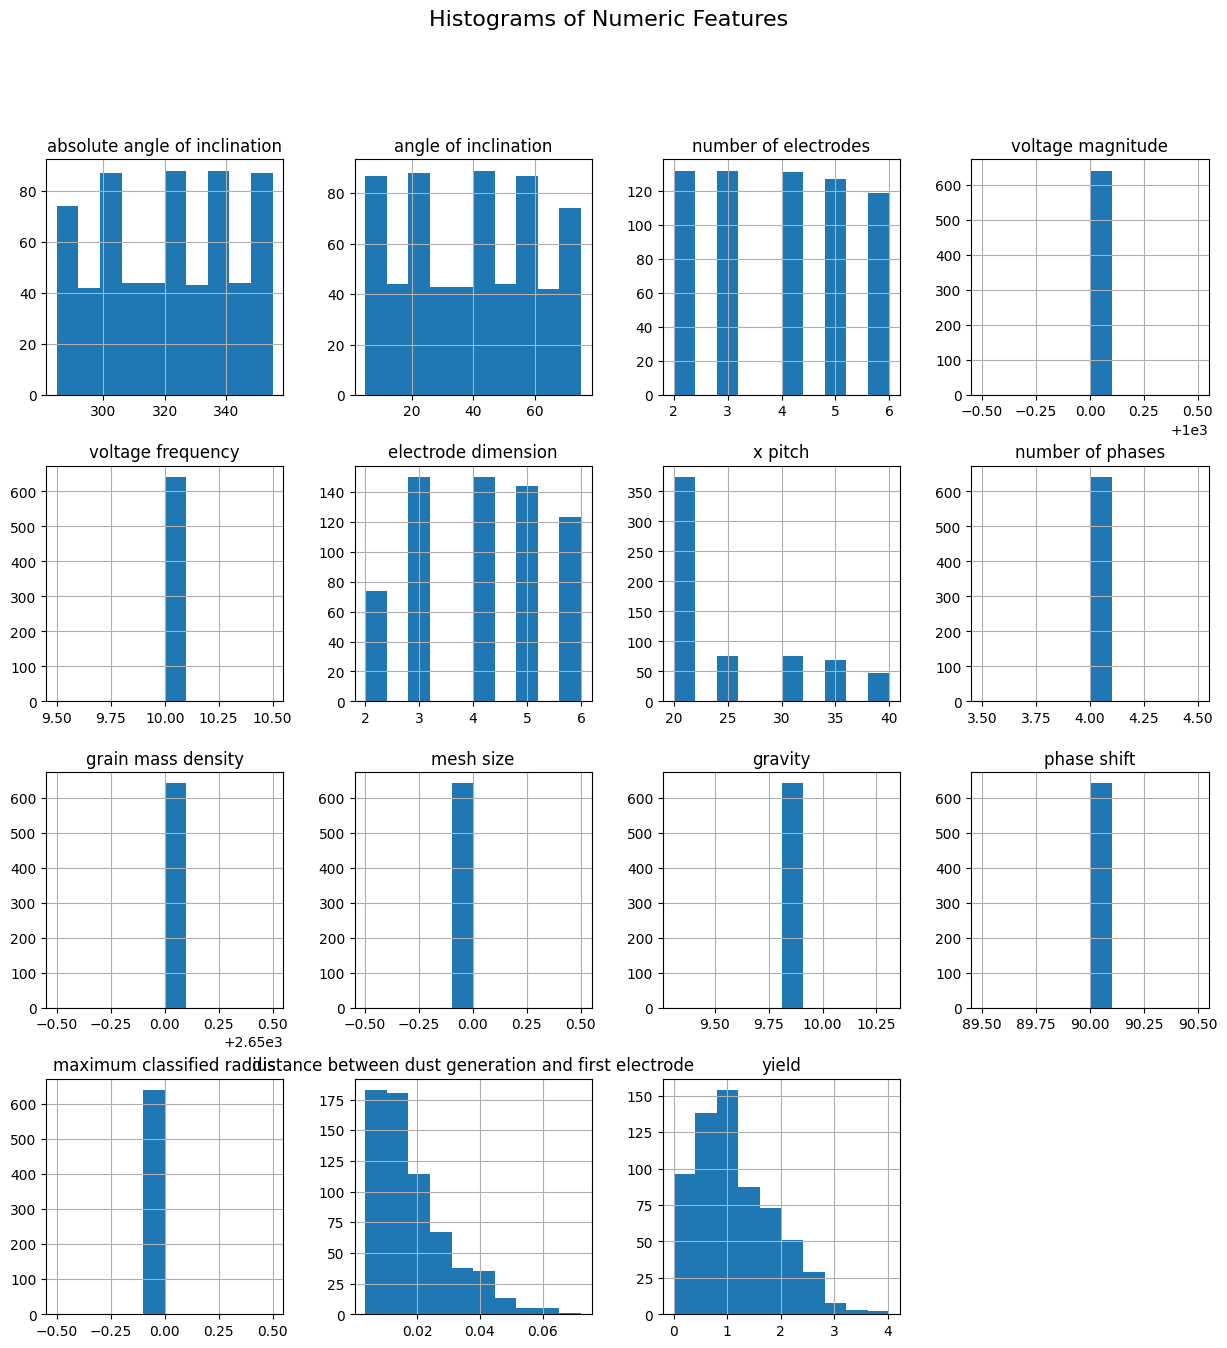

In [57]:
import matplotlib.pyplot as plt

numeric_features = data.select_dtypes(include=['float64'])
numeric_features.hist(figsize=(15, 15))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [58]:
drop_features = ['voltage magnitude', 'voltage frequency', 'number of phases',
                 'grain mass density', 'mesh size', 'gravity',
                 'phase shift', 'maximum classified radius', 'angle of inclination']
target = 'yield'
data = data.drop(columns= drop_features)
data

,absolute angle of inclination,number of electrodes,electrode dimension,x pitch,distance between dust generation and first electrode,yield
0,355.0,3.0,2.0,20.0,0.007250,0.126490
1,355.0,4.0,2.0,20.0,0.006375,0.092699
2,355.0,5.0,2.0,20.0,0.005500,0.082674
3,355.0,6.0,2.0,20.0,0.009626,0.175985
4,355.0,2.0,3.0,20.0,0.007625,0.356726
...,...,...,...,...,...,...
636,285.0,3.0,4.0,30.0,0.061038,0.146419
637,285.0,4.0,4.0,30.0,0.060058,0.000000
638,285.0,5.0,4.0,30.0,0.059077,0.000034
639,285.0,6.0,4.0,30.0,0.063096,2.766215


In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import numpy as np
X = data.drop(target, axis=1)  # Features (independent variables)
y = data[target]                # Target (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [61]:
param_grid = {
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [62]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [63]:
# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

In [64]:
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring=make_scorer(rmse, greater_is_better=False),return_train_score=True )
grid_search.fit(X_train, y_train)

#get best parameter
cv_results = grid_search.cv_results_
best_index = grid_search.best_index_

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
results_dict = {
            'fit_time': np.mean(cv_results['mean_fit_time'][best_index]),
            'score_time': np.mean(cv_results['mean_score_time'][best_index]),
            'train_score': -cv_results['mean_train_score'][best_index],  # Convert to positive
            'test_score': -cv_results['mean_test_score'][best_index],     # Convert to positive
            'best_params': grid_search.best_params_
}



Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}


/home/da0698@unt.ad.unt.edu/anaconda3/envs/dlgpu/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/da0698@unt.ad.unt.edu/anaconda3/envs/dlgpu/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/da0698@unt.ad.unt.edu/anaconda3/envs/dlgpu/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/da0698@unt.ad.unt.edu/anaconda3/envs/dlgpu/lib/python3.12/site-p

In [67]:
# Display the results
print(results_dict)

{'fit_time': 0.0010810375213623046, 'score_time': 0.0004529476165771484, 'train_score': 0.28055466465839707, 'test_score': 0.38699917818345764, 'best_params': {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}}


In [68]:
# Train the best estimator
best_regressor = grid_search.best_estimator_

In [69]:
# Make predictions on the test set
y_pred = best_regressor.predict(X_test)


In [70]:
# evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [71]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.19506931331134242
R^2 Score: 0.6687496725050084


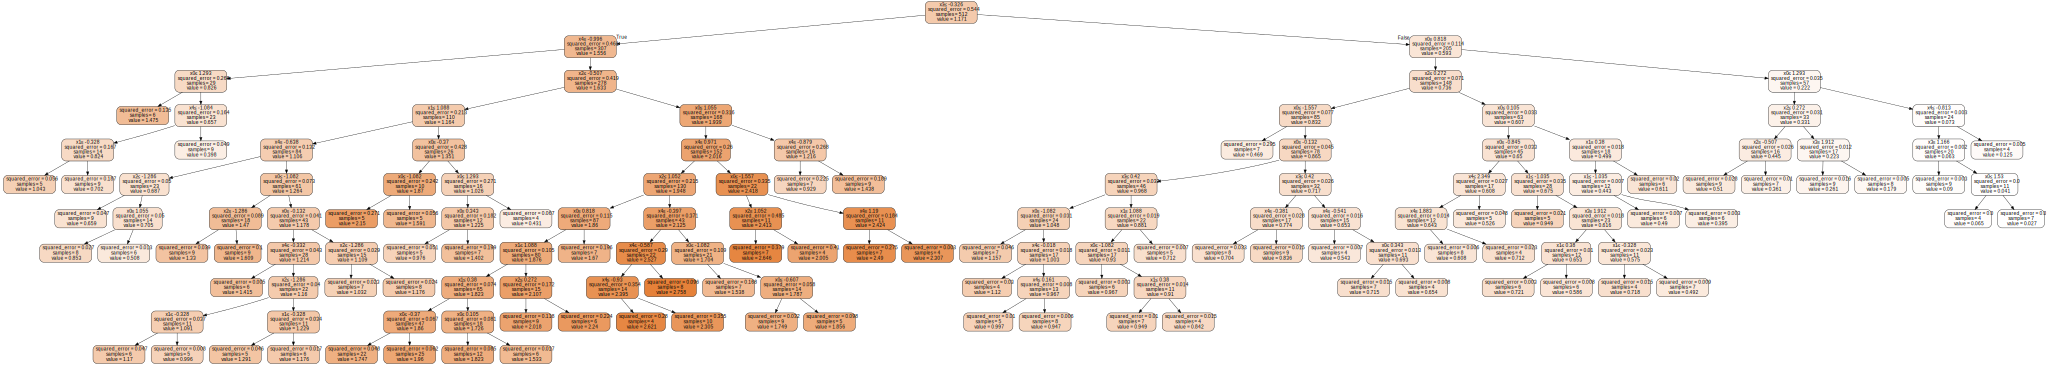

In [72]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(best_regressor, out_file=None, 
                      filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


In [73]:
# input the new random test data
new_test_data = np.array([[280.0, 4.0, 3.0, 25.0, 0.0081]])
#transform it
new_test_data= sc.transform(new_test_data)
#Make the yield prediction
new_pred = best_regressor.predict(new_test_data)

#print the predicted yield
print("Predicted yield: ", new_pred )

Predicted yield:  [0.46860899]


/home/da0698@unt.ad.unt.edu/anaconda3/envs/dlgpu/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
